In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import hdbscan

In [2]:
new_data = pd.read_csv(r'new_data.csv', delimiter=',',escapechar='\\',header=0,on_bad_lines='skip', encoding='utf-8')

In [3]:
X = new_data.drop(columns=['bad_flag', 'account_number'])

In [4]:
y = new_data['bad_flag']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=80,  # Minimum size of a cluster
    min_samples=10,       # Minimum number of samples in a neighborhood
    cluster_selection_epsilon=0.5,  # Fine-tuning neighborhood radius
    metric='euclidean'    # Distance metric
)

In [7]:
cluster_labels = clusterer.fit_predict(X_scaled)

In [8]:
# Step 4: Analyze the Clusters
# Number of clusters found
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Number of clusters found: {n_clusters}")

Number of clusters found: 42


In [ ]:
# Cluster assignments
print("Cluster labels distribution:")
unique, counts = np.unique(cluster_labels, return_counts=True)
print(dict(zip(unique, counts)))

Cluster labels distribution:
{-1: 46578, 0: 1644, 1: 239, 2: 113, 3: 184, 4: 213, 5: 156, 6: 2724, 7: 193, 8: 472, 9: 177, 10: 354, 11: 256, 12: 83, 13: 593, 14: 646, 15: 241, 16: 298, 17: 120, 18: 2009, 19: 507, 20: 112, 21: 604, 22: 1616, 23: 1221, 24: 493, 25: 154, 26: 754, 27: 109, 28: 196, 29: 275, 30: 784, 31: 152, 32: 901, 33: 2233, 34: 1593, 35: 491, 36: 5340, 37: 533, 38: 106, 39: 170, 40: 836, 41: 20333}


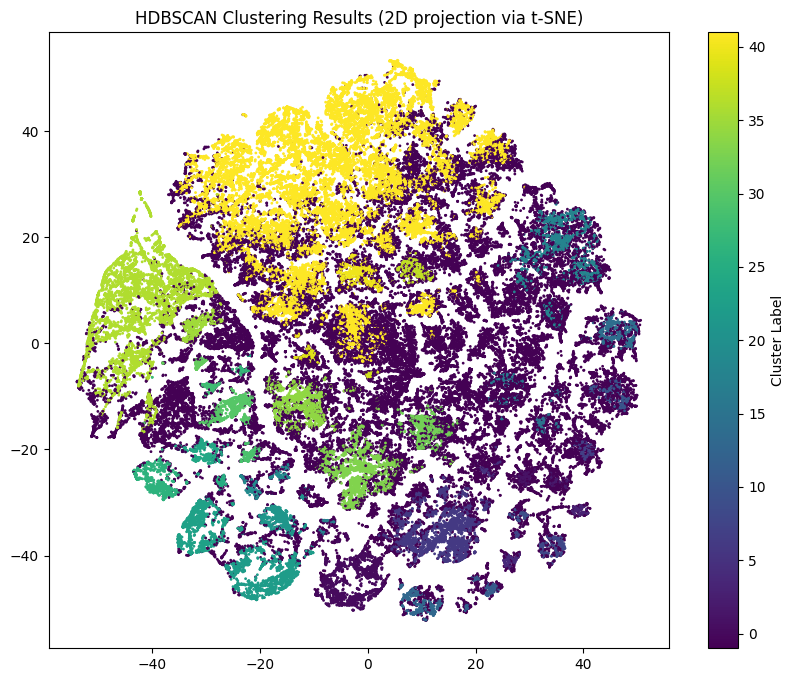

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Adjusting t-SNE parameters for better visualization
# Try different values for perplexity and learning rate
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)

# Apply t-SNE to the scaled data
X_embedded = tsne.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels, cmap='viridis', s=1)

# Add color bar
plt.colorbar(scatter, label="Cluster Label")
plt.title("HDBSCAN Clustering Results (2D projection via t-SNE)")

# Show the plot
plt.show()

In [ ]:
plt.savefig('my_plot.png')

<Figure size 640x480 with 0 Axes>